In [41]:
import pandas as pd

testing_df = pd.read_csv('data/testing/testing_dataset.csv')
testing_df.columns

Index(['text', 'Sentiment_Text'], dtype='object')

In [42]:
import asyncio
from model_implementation import predict

async def analyze_sentiment(text):
    return await predict(text)

async def process_dataframe(df, text_column, sentiment_col):
    tasks = [analyze_sentiment(text) for text in df[text_column]]
    sentiments = await asyncio.gather(*tasks)
    df[sentiment_col] = sentiments
    return df

await process_dataframe(testing_df, 'text', 'Predicted_Sentiment_Text')

,text,Sentiment_Text,Predicted_Sentiment_Text
0,"Walao, this shop damn expensive lah!",0,Negative
1,"Bro, jom go makan nasi lemak at that place!",1,Positive
2,"Aiyo, why you so blur one?",0,Negative
3,"This movie damn syok, must watch!",2,Neutral
4,Can borrow me your charger ah?,1,Negative
...,...,...,...
64,NaN,1,Neutral
65,hm sy kecewa sedikit sbb penghantaran agak lam...,0,Negative
66,Mintak dark blue hantar mild 😅😅😅😅 check la dul...,0,Neutral
67,Terlalu Banyak foreign yarn yang terlalu besar...,0,Neutral


In [43]:
label_dict = {
    0:'Negative',
    1:'Neutral',
    2:'Positive'
}

testing_df['Sentiment_Text'] = testing_df['Sentiment_Text'].apply(lambda x: label_dict[x])

In [44]:
testing_df.head()

,text,Sentiment_Text,Predicted_Sentiment_Text
0,"Walao, this shop damn expensive lah!",Negative,Negative
1,"Bro, jom go makan nasi lemak at that place!",Neutral,Positive
2,"Aiyo, why you so blur one?",Negative,Negative
3,"This movie damn syok, must watch!",Positive,Neutral
4,Can borrow me your charger ah?,Neutral,Negative


In [45]:
from sklearn.metrics import confusion_matrix, classification_report

y_true = testing_df['Sentiment_Text']
y_pred = testing_df['Predicted_Sentiment_Text']

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:\n", classification_report(y_true, y_pred))


Confusion Matrix:
 [[12 12  0]
 [ 3 13  1]
 [ 6  8 14]]

Classification Report:
               precision    recall  f1-score   support

    Negative       0.57      0.50      0.53        24
     Neutral       0.39      0.76      0.52        17
    Positive       0.93      0.50      0.65        28

    accuracy                           0.57        69
   macro avg       0.63      0.59      0.57        69
weighted avg       0.67      0.57      0.58        69



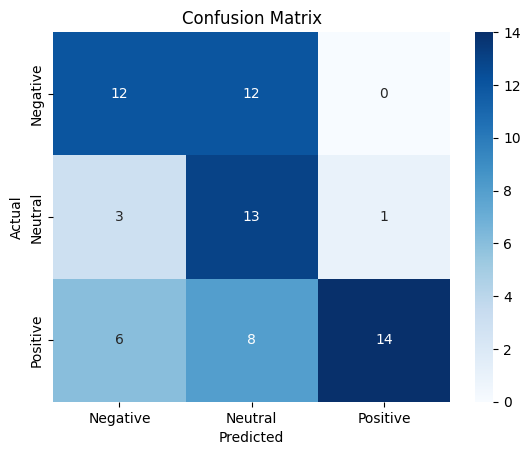

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

labels = sorted(testing_df['Sentiment_Text'].unique()) 

sns.heatmap(pd.DataFrame(cm, index=labels, columns=labels), 
            annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()